In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

import seaborn as sns

In [2]:
dfStarClassification = pd.read_csv("/Users/KDolp/Desktop/Физтех/Data Analysis/Lab2/Stars.csv",sep=",")
dfStarClassification = dfStarClassification.astype({"Type": str})

In [3]:
continuousColumns = ["Temperature","L","R","A_M"]
willOneHotEncode = ["Color","Spectral_Class"]
willScale  = continuousColumns

In [4]:
for item in willOneHotEncode:
    dfStarClassification = pd.concat([dfStarClassification,pd.get_dummies(dfStarClassification[item],prefix=item)],axis=1)
    dfStarClassification = dfStarClassification.drop(columns=[item])

In [5]:
minMaxScaler = MinMaxScaler()
scaledColums = pd.DataFrame(minMaxScaler.fit_transform(dfStarClassification[willScale]),columns=willScale)

In [6]:
scaler = StandardScaler()
X_std = scaler.fit_transform(dfStarClassification)
pca = PCA()
X_pca = pca.fit_transform(X_std)
exp_var_pca = pca.explained_variance_ratio_
cum_sum_eigenvalues = np.cumsum(exp_var_pca)

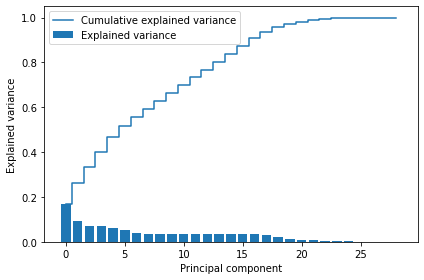

In [7]:
plt.bar(range(0,len(exp_var_pca)), exp_var_pca, align='center', label='Explained variance')
plt.step(range(0,len(cum_sum_eigenvalues)), cum_sum_eigenvalues, where='mid',label='Cumulative explained variance')
plt.ylabel('Explained variance')
plt.xlabel('Principal component')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

In [8]:
pca = PCA(n_components=2)
pca_result = pca.fit_transform(dfStarClassification)

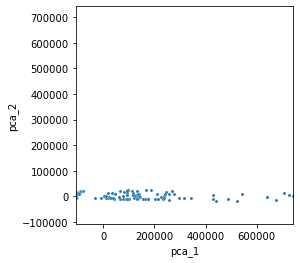

In [9]:
pca_result_df = pd.DataFrame({'pca_1': pca_result[:,0], 'pca_2': pca_result[:,1]})

fig, ax = plt.subplots(1)
sns.scatterplot(x='pca_1', y='pca_2', data=pca_result_df, ax=ax,s=10)
lim = (pca_result.min()-5, pca_result.max()+5)
ax.set_xlim(lim)
ax.set_ylim(lim)
ax.set_aspect('equal')

In [10]:
tsne = TSNE(n_components=2)
tsne_result = tsne.fit_transform(dfStarClassification)

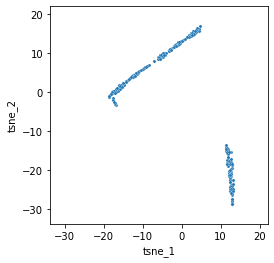

In [11]:
tsne_result_df = pd.DataFrame({'tsne_1': tsne_result[:,0], 'tsne_2': tsne_result[:,1]})

fig, ax = plt.subplots(1)
sns.scatterplot(x='tsne_1', y='tsne_2', data=tsne_result_df, ax=ax,s=10)
lim = (tsne_result.min()-5, tsne_result.max()+5)
ax.set_xlim(lim)
ax.set_ylim(lim)
ax.set_aspect('equal')